![Ontario Market](LogoOntarioMarket.png)

# Ontario Market - Primera Entrega del Proyecto

El análisis de los clientes ayuda a modificar un producto en función a los diferentes segmentos de ellos. Por ejemplo, desarrollar estrategias de ventas enfocadas a los clientes de mayor potencial, y con productos especificos.

En la siguiente sección, iremos a través de un proyecto de ciencia de datos sobre el análisis de la personalidad del cliente con python. Aqui usaremos un conjunto de datos recopilados de una campaña de marketing, donde nuestra tarea es predecir cómo responderán los diferentes segmentos de clientes para un producto o servicio en particular.

### Diccionario de Variables
#### People
1. ID: Customer's unique identifier
1. Year_Birth: Customer's birth year
1. Education: Customer's education level
1. Marital_Status: Customer's marital status
1. Income: Customer's yearly household income
1. Kidhome: Number of children in customer's household
1. Teenhome: Number of teenagers in customer's household
1. Dt_Customer: Date of customer's enrollment with the company
1. Recency: Number of days since customer's last purchase
1. Complain: 1 if the customer complained in the last 2 years, 0 otherwise
#### Products
1. MntWines: Amount spent on wine in last 2 years
1. MntFruits: Amount spent on fruits in last 2 years
1. MntMeatProducts: Amount spent on meat in last 2 years
1. MntFishProducts: Amount spent on fish in last 2 years
1. MntSweetProducts: Amount spent on sweets in last 2 years
1. MntGoldProds: Amount spent on gold in last 2 years
#### Promotion
1. NumDealsPurchases: Number of purchases made with a discount
1. AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
1. AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
1. AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
1. AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
1. AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
1. Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
#### Place
1. NumWebPurchases: Number of purchases made through the company’s website
1. NumCatalogPurchases: Number of purchases made using a catalogue
1. NumStorePurchases: Number of purchases made directly in stores
1. NumWebVisitsMonth: Number of visits to company’s website in the last month

### Pasos de este estudio
1. Indicación de la fuente del dataset
1. Carga de datos
1. Exploración de datos
1. Procesamiento de datos
1. Análisis de variables

# Análisis de Datos

## 1. Fuente del dataset
https://raw.githubusercontent.com/amankharwal/Website-data/master/marketing_campaign.csv

## 2. Carga de Datos

In [ ]:
#Instalar Pandas Profiling
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [4]:
#Importar librerias
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pdp

In [204]:
#Lectura de datos
data = pd.read_csv('marketing_campaign.csv', sep='\t')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


## 3. Exploración de Datos

In [9]:
#Dimensiones del dataset
print(f'Este data set tiene {str(data.shape[0])} filas, y {str(data.shape[1])} columnas')

Este data set tiene 2240 filas, y 29 columnas


In [10]:
#Columnas del dataset
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [11]:
#Tipo de datos y cantidad de No Nulos en cada columna
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [17]:
#Distribución de las variables numericas
data.describe().round(1).T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.2,3246.7,0.0,2828.2,5458.5,8427.8,11191.0
Year_Birth,2240.0,1968.8,12.0,1893.0,1959.0,1970.0,1977.0,1996.0
Income,2216.0,52247.3,25173.1,1730.0,35303.0,51381.5,68522.0,666666.0
Kidhome,2240.0,0.4,0.5,0.0,0.0,0.0,1.0,2.0
Teenhome,2240.0,0.5,0.5,0.0,0.0,0.0,1.0,2.0
Recency,2240.0,49.1,29.0,0.0,24.0,49.0,74.0,99.0
MntWines,2240.0,303.9,336.6,0.0,23.8,173.5,504.2,1493.0
MntFruits,2240.0,26.3,39.8,0.0,1.0,8.0,33.0,199.0
MntMeatProducts,2240.0,167.0,225.7,0.0,16.0,67.0,232.0,1725.0
MntFishProducts,2240.0,37.5,54.6,0.0,3.0,12.0,50.0,259.0


In [14]:
#Distribución de las variables categóricas
data.describe(include=['O']).T

,count,unique,top,freq
Education,2240,5,Graduation,1127
Marital_Status,2240,8,Married,864
Dt_Customer,2240,663,31-08-2012,12


C:\Users\jeanp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income'>

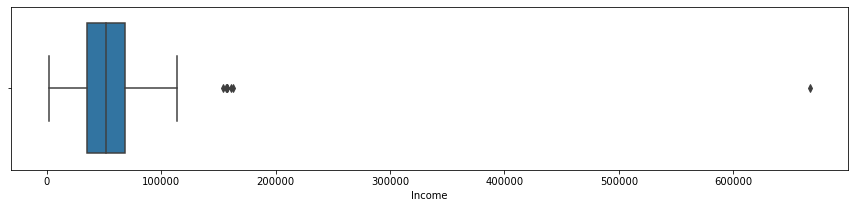

In [141]:
fig, ax = plt.subplots(figsize=(15, 3))
sns.boxplot(data.Income)

# 4. Procesamiento de datos

In [199]:
#Fijar la columna "ID" como index del dataframe
data = data.set_index('ID')

In [200]:
#Se considera eliminar los datos faltantes en la columna "Income", por ser solamente 24 entradas, 1% del dataset.
data = data.dropna()

In [216]:
#Eliminación de outliers
data = data[data.Income < 600000]

In [208]:
#Calcular columna de edad "Age", a la fecha del Dataset.
data['Age'] = 2014 - data.Year_Birth

In [209]:
#Calcular columna de gastos total "Spending".
data['Spending'] = data.MntWines + data.MntFruits + data.MntMeatProducts + data.MntFishProducts + data.MntSweetProducts + data.MntGoldProds

In [211]:
#Convertir a datetime la columna "Dt_Customer".
data.Dt_Customer = pd.to_datetime(data.Dt_Customer)

In [212]:
#Simplificar "Education" y cambiar a variables tipo int.
data.Education = data.Education.replace({'Basic':'Not Graduated','2n Cycle':'Not Graduated','Graduation':'Graduated','Master':'Graduated','PhD':'Graduated'}).map({'Not Graduated': 0, 'Graduated': 1}).astype(int)

In [213]:
#Simplificar "Marital_Status" y cambiar a variables tipo int.
data.Marital_Status = data.Marital_Status.replace({'Divorced':'Alone','Single':'Alone','Married':'In couple','Together':'In couple','Absurd':'Alone','Widow':'Alone','YOLO':'Alone'}).map({'Alone': 0, 'In couple': 1}).astype(int)

In [214]:
#Renombrar columnas.
data = data.rename(columns={'NumWebPurchases': 'Web_Purchases','NumCatalogPurchases':'Catalog_Purchases','NumStorePurchases':'Store_Purchases','MntWines': 'Wines','MntFruits':'Fruits','MntMeatProducts':'Meat','MntFishProducts':'Fish','MntSweetProducts':'Sweets','MntGoldProds':'Gold'})

# 5. Análisis de variables

In [222]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish',
       'Sweets', 'Gold', 'NumDealsPurchases', 'Web_Purchases',
       'Catalog_Purchases', 'Store_Purchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Spending'],
      dtype='object')

TypeError: 'AxesSubplot' object is not subscriptable

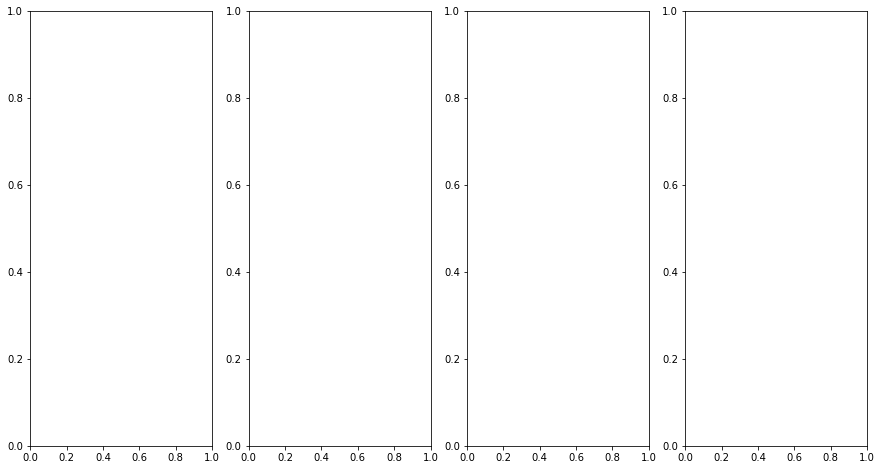

In [231]:
variables = ['Wines', 'Fruits', 'Meat', 'Fish',
       'Sweets', 'Gold']

columns = 4

fig, axes = plt.subplots(len(variables) //columns, columns, figsize=(15,8))

for current_idx, variable in enumerate(variables):
    i = current_idx // columns
    j = current_idx % columns
    sns.distplot(data[variable], ax=axes[i][j])
    axes[i][j].set_title(variable)
    axes[i][j].set_xlabel("")
    
plt.tight_layout()

AttributeError: 'DataFrame' object has no attribute 'TotalSpent'

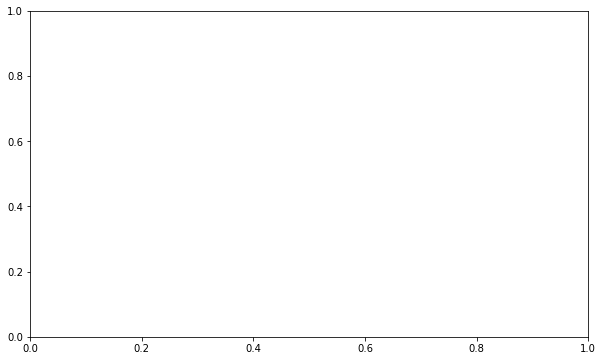

In [230]:
fig, ax = plt.subplots(figsize=(10, 6))
ax[0] = 
sns.distplot(data.TotalSpent, bins=10)